In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('manufacturing_data.csv')
df.head()

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
0,2/24/2015,Q4,Stitching Unit,Tuesday,Line-S1,0.6,22.53,708.0,5040,0,0.0,0,Minor Style Revision,42.0,0.268214
1,1/19/2015,Q3,Stitching Unit,Monday,Line-F3,0.8,11.41,1028.0,4380,50,0.0,0,No Style Change,31.0,0.800359
2,01-06-2015,Q1,Finishing & Quality,Tuesday,Line-C2,0.8,2.90,NaN,1440,0,0.0,0,No Style Change,8.0,0.681061
3,2/24/2015,Q4,Finishing & Quality,Tuesday,Line-S2,0.7,3.90,NaN,960,0,0.0,0,No Style Change,8.0,0.325000
4,01-04-2015,Q1,Finishing & Quality,Sunday,Line-C1,0.8,2.90,NaN,960,0,0.0,0,No Style Change,8.0,0.667604


In [3]:
df.shape

(1197, 15)

In [4]:
df = df[df['productionDept'] == 'Stitching Unit']
df.head()

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
0,2/24/2015,Q4,Stitching Unit,Tuesday,Line-S1,0.60,22.53,708.0,5040,0,0.0,0,Minor Style Revision,42.0,0.268214
1,1/19/2015,Q3,Stitching Unit,Monday,Line-F3,0.80,11.41,1028.0,4380,50,0.0,0,No Style Change,31.0,0.800359
5,2/16/2015,Q3,Stitching Unit,Monday,Line-F2,0.80,30.10,461.0,0,0,0.0,0,No Style Change,59.0,0.800980
8,1/24/2015,Q4,Stitching Unit,Saturday,Line-C1,0.65,22.52,1295.0,10170,26,0.0,0,No Style Change,56.5,0.650417
9,03-05-2015,Q1,Stitching Unit,Thursday,Line-Q1,0.75,18.79,1228.0,6240,45,0.0,0,No Style Change,52.0,0.750396


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 0 to 1195
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   recordDate           691 non-null    object 
 1   fiscalQuarter        691 non-null    object 
 2   productionDept       691 non-null    object 
 3   dayOfWeek            691 non-null    object 
 4   team                 691 non-null    object 
 5   plannedEfficiency    691 non-null    float64
 6   standardMinuteValue  691 non-null    float64
 7   workInProgress       691 non-null    float64
 8   overtimeMinutes      691 non-null    int64  
 9   performanceBonus     691 non-null    int64  
 10  idleMinutes          691 non-null    float64
 11  idleWorkers          691 non-null    int64  
 12  styleChangeCount     691 non-null    object 
 13  workerCount          691 non-null    float64
 14  efficiencyScore      691 non-null    float64
dtypes: float64(6), int64(3), object(6)
memory us

In [6]:
df.isnull().sum()

recordDate             0
fiscalQuarter          0
productionDept         0
dayOfWeek              0
team                   0
plannedEfficiency      0
standardMinuteValue    0
workInProgress         0
overtimeMinutes        0
performanceBonus       0
idleMinutes            0
idleWorkers            0
styleChangeCount       0
workerCount            0
efficiencyScore        0
dtype: int64

In [7]:
df.shape

(691, 15)

In [8]:
df.describe()

,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,workerCount,efficiencyScore
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,0.723980,23.245412,1190.465991,6508.205499,44.483357,1.264834,0.639653,52.445731,0.722013
std,0.102006,6.976497,1837.455001,2864.505604,27.596591,16.712923,4.283652,9.417353,0.154784
min,0.070000,10.050000,7.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.233705
25%,0.700000,18.790000,774.500000,4560.000000,30.000000,0.000000,0.000000,52.000000,0.661470
50%,0.750000,22.520000,1039.000000,6840.000000,45.000000,0.000000,0.000000,57.000000,0.750608
75%,0.800000,28.080000,1252.500000,7200.000000,60.000000,0.000000,0.000000,58.000000,0.800402
max,0.800000,54.560000,23122.000000,25920.000000,138.000000,300.000000,45.000000,89.000000,1.100484


In [9]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()['efficiencyScore'].sort_values(ascending=False)
print(corr_matrix)

efficiencyScore        1.000000
performanceBonus       0.804149
plannedEfficiency      0.697970
workInProgress         0.131147
workerCount            0.003378
overtimeMinutes       -0.016875
idleMinutes           -0.113737
standardMinuteValue   -0.155676
idleWorkers           -0.258357
Name: efficiencyScore, dtype: float64


In [10]:
df.head()

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
0,2/24/2015,Q4,Stitching Unit,Tuesday,Line-S1,0.60,22.53,708.0,5040,0,0.0,0,Minor Style Revision,42.0,0.268214
1,1/19/2015,Q3,Stitching Unit,Monday,Line-F3,0.80,11.41,1028.0,4380,50,0.0,0,No Style Change,31.0,0.800359
5,2/16/2015,Q3,Stitching Unit,Monday,Line-F2,0.80,30.10,461.0,0,0,0.0,0,No Style Change,59.0,0.800980
8,1/24/2015,Q4,Stitching Unit,Saturday,Line-C1,0.65,22.52,1295.0,10170,26,0.0,0,No Style Change,56.5,0.650417
9,03-05-2015,Q1,Stitching Unit,Thursday,Line-Q1,0.75,18.79,1228.0,6240,45,0.0,0,No Style Change,52.0,0.750396


In [11]:
df['idleMinutes'].value_counts()

idleMinutes
0.0      673
3.5        3
2.0        2
4.0        2
5.0        2
4.5        2
8.0        2
270.0      1
150.0      1
6.5        1
90.0       1
300.0      1
Name: count, dtype: int64

In [12]:
df['idleWorkers'].value_counts()

idleWorkers
0     673
10      3
15      3
30      3
20      3
35      2
37      1
45      1
25      1
40      1
Name: count, dtype: int64

In [13]:
df = df.drop(columns=['productionDept', 'recordDate', 'idleWorkers', 'idleMinutes'])
df.shape

(691, 11)

In [14]:
df.head()

,fiscalQuarter,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,styleChangeCount,workerCount,efficiencyScore
0,Q4,Tuesday,Line-S1,0.60,22.53,708.0,5040,0,Minor Style Revision,42.0,0.268214
1,Q3,Monday,Line-F3,0.80,11.41,1028.0,4380,50,No Style Change,31.0,0.800359
5,Q3,Monday,Line-F2,0.80,30.10,461.0,0,0,No Style Change,59.0,0.800980
8,Q4,Saturday,Line-C1,0.65,22.52,1295.0,10170,26,No Style Change,56.5,0.650417
9,Q1,Thursday,Line-Q1,0.75,18.79,1228.0,6240,45,No Style Change,52.0,0.750396


In [15]:
df.shape

(691, 11)

Data Visualization 

In [16]:
features = df.drop(columns=['efficiencyScore'])
numerical_features = ['plannedEfficiency', 'standardMinuteValue', 'workInProgress', 'overtimeMinutes', 'performanceBonus', 'workerCount']
categorical_features = ['fiscalQuarter', 'dayOfWeek', 'team', 'styleChangeCount']
target = 'efficiencyScore'

C:\Users\admin\AppData\Local\Temp\ipykernel_8820\3965298798.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df[target], palette='Set2')


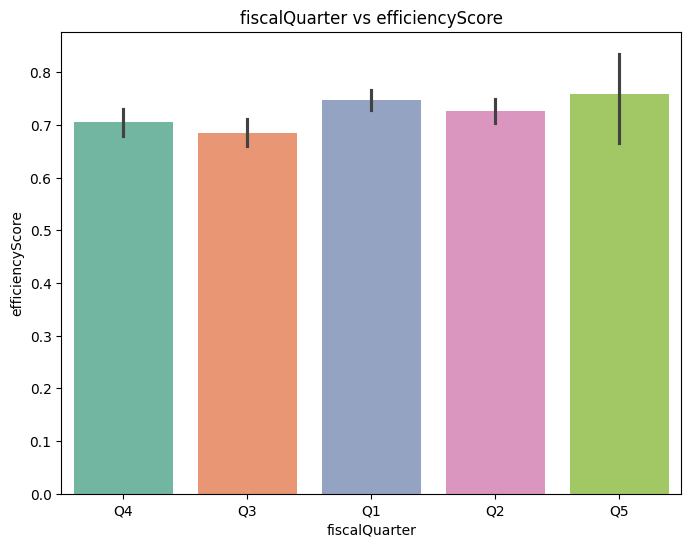

C:\Users\admin\AppData\Local\Temp\ipykernel_8820\3965298798.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df[target], palette='Set2')


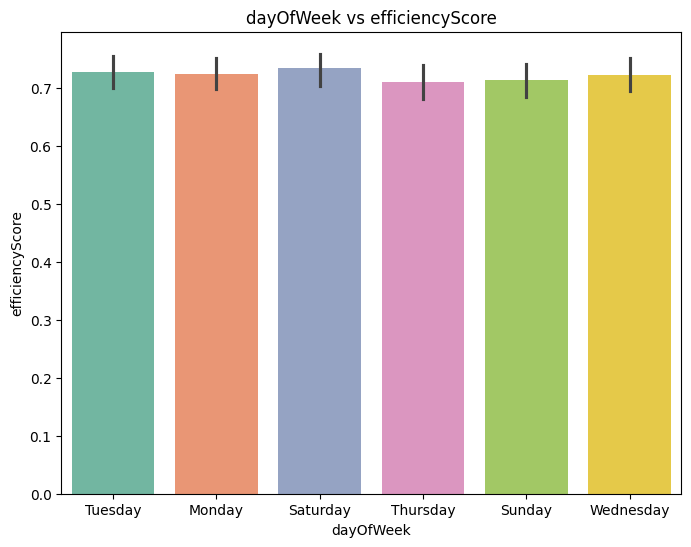

C:\Users\admin\AppData\Local\Temp\ipykernel_8820\3965298798.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df[target], palette='Set2')


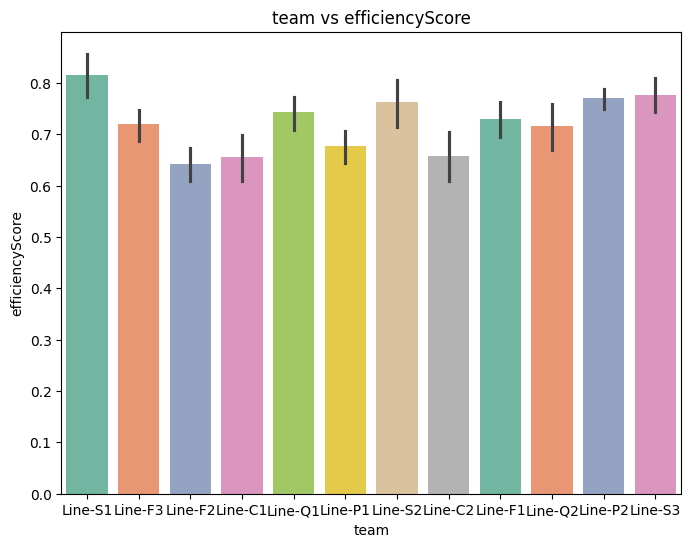

C:\Users\admin\AppData\Local\Temp\ipykernel_8820\3965298798.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df[target], palette='Set2')


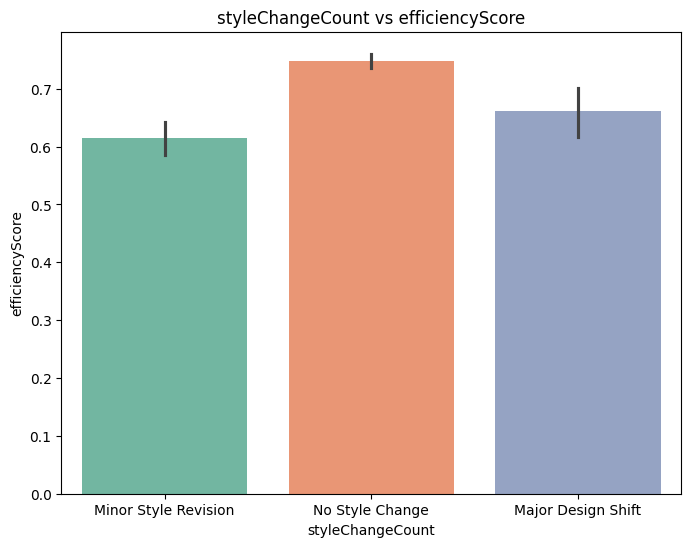

In [17]:
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=df[col], y=df[target], palette='Set2')
    plt.title(f'{col} vs {target}')
    plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_8820\3124827989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='plannedEfficiency', y='efficiencyScore', data=df, palette='Set2')


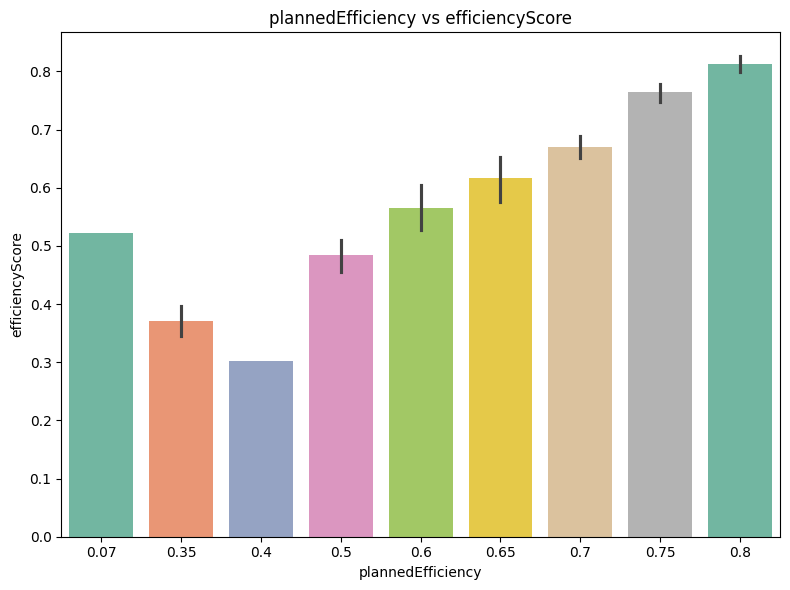

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(x='plannedEfficiency', y='efficiencyScore', data=df, palette='Set2')
plt.title('plannedEfficiency vs efficiencyScore')
plt.tight_layout()
plt.show()

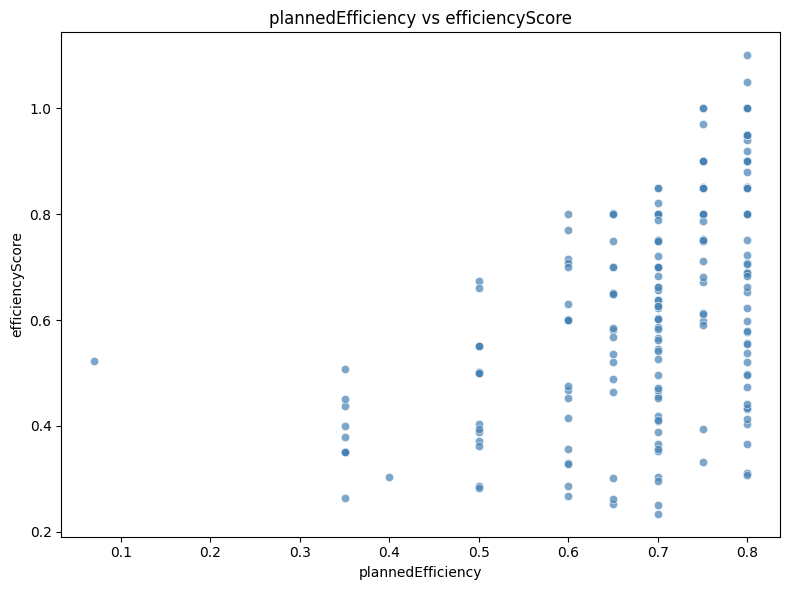

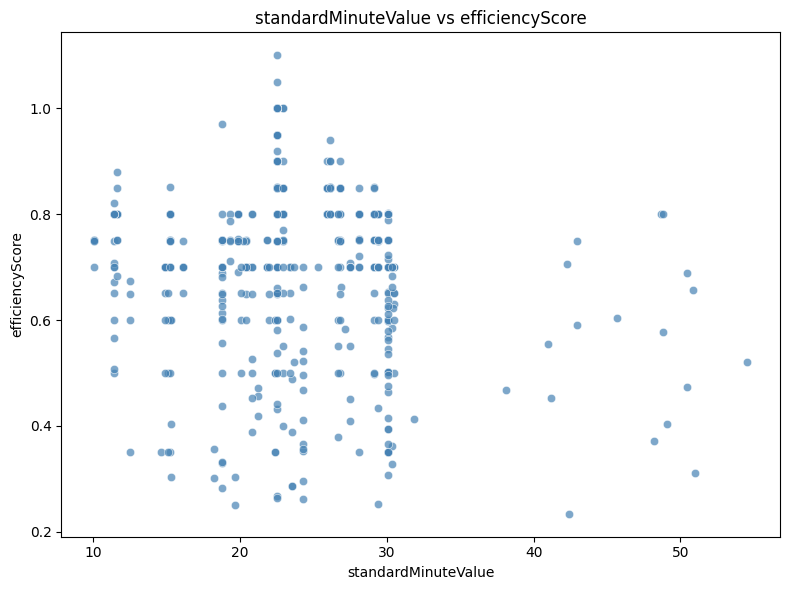

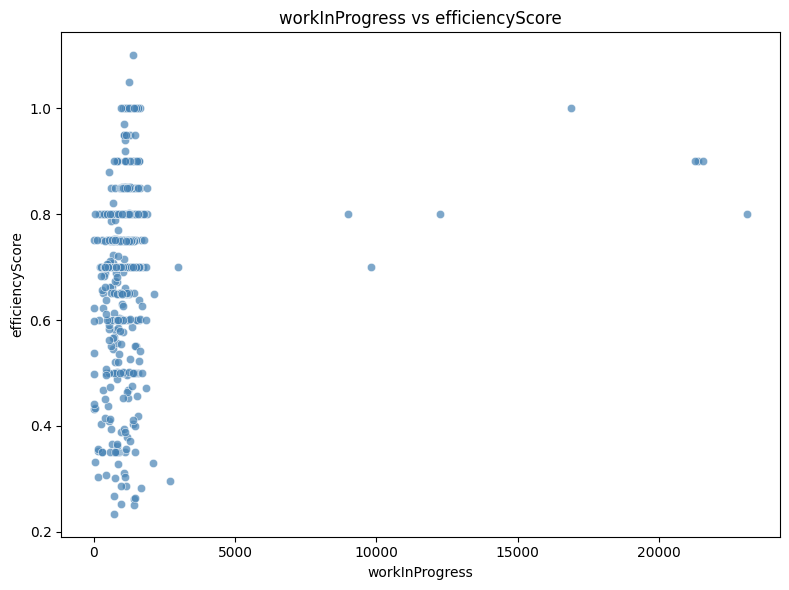

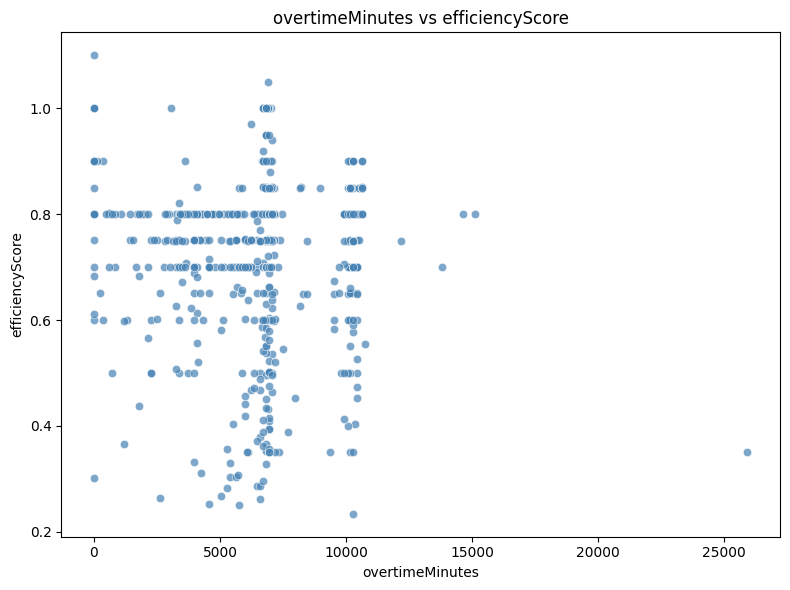

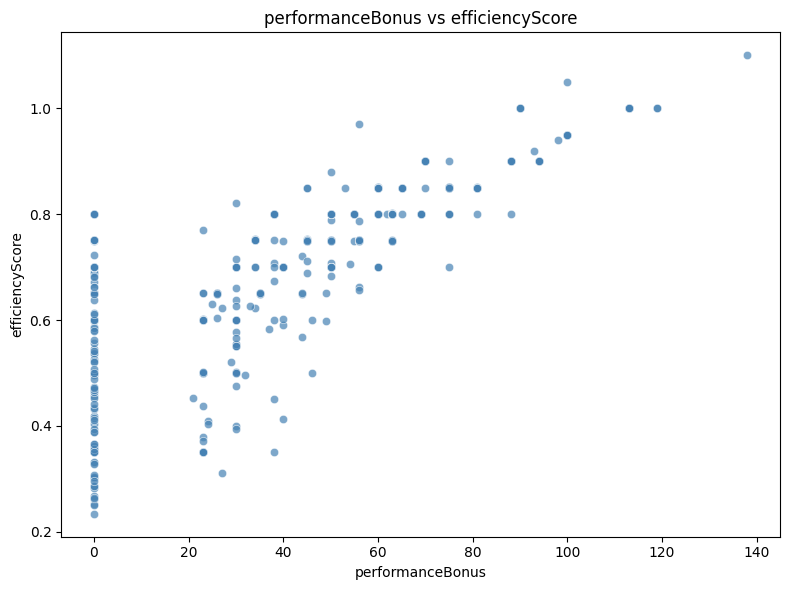

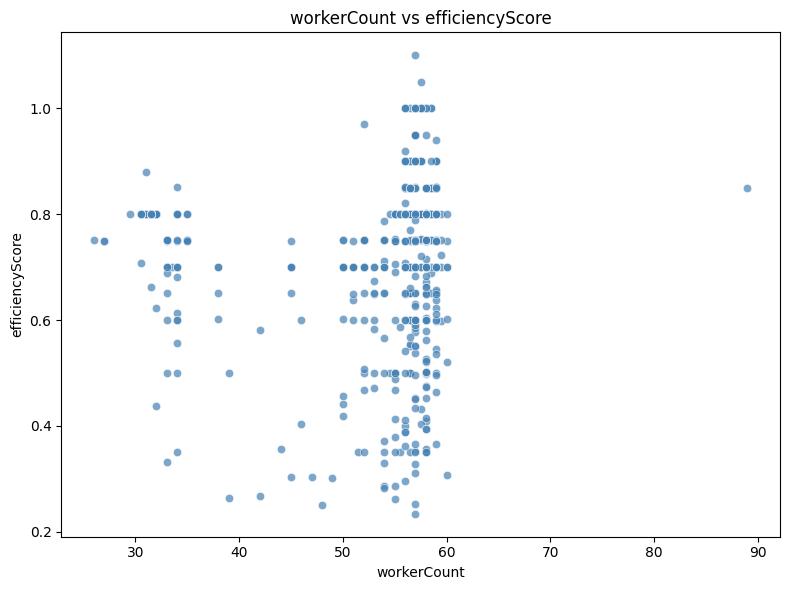

In [19]:
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col], y=df[target], alpha=0.7, color='steelblue')
    plt.title(f'{col} vs {target}')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()

In [20]:
df.shape

(691, 11)

In [21]:
df.head()

,fiscalQuarter,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,styleChangeCount,workerCount,efficiencyScore
0,Q4,Tuesday,Line-S1,0.60,22.53,708.0,5040,0,Minor Style Revision,42.0,0.268214
1,Q3,Monday,Line-F3,0.80,11.41,1028.0,4380,50,No Style Change,31.0,0.800359
5,Q3,Monday,Line-F2,0.80,30.10,461.0,0,0,No Style Change,59.0,0.800980
8,Q4,Saturday,Line-C1,0.65,22.52,1295.0,10170,26,No Style Change,56.5,0.650417
9,Q1,Thursday,Line-Q1,0.75,18.79,1228.0,6240,45,No Style Change,52.0,0.750396


Separating Features and Target

In [22]:
X = df[['fiscalQuarter', 'dayOfWeek', 'team', 'plannedEfficiency', 'standardMinuteValue', 'workInProgress', 'overtimeMinutes', 'performanceBonus', 'styleChangeCount', 'workerCount']]
y = df['efficiencyScore']

Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((552, 10), (139, 10))

In [24]:
X_train.head()

,fiscalQuarter,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,styleChangeCount,workerCount
167,Q4,Sunday,Line-P2,0.70,15.26,1296.0,6120,40,No Style Change,34.0
127,Q2,Thursday,Line-Q1,0.80,26.16,1216.0,10620,88,No Style Change,59.0
86,Q5,Saturday,Line-P1,0.65,20.10,1417.0,6480,49,No Style Change,54.0
356,Q1,Wednesday,Line-S1,0.80,26.16,1179.0,10620,75,No Style Change,59.0
979,Q1,Saturday,Line-F1,0.60,30.10,486.0,6780,30,Minor Style Revision,57.0


Encoding Categorical Features

In [25]:
numerical_features = ['plannedEfficiency', 'standardMinuteValue', 'overtimeMinutes', 'performanceBonus','workerCount']
categorical_features = ['fiscalQuarter', 'dayOfWeek', 'team','styleChangeCount']

In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
for col in categorical_features:
    combined = pd.concat([X_train[col], X_test[col]], axis=0)
    le.fit(combined)
    X_train.loc[:, col] = le.transform(X_train[col])
    X_test.loc[:, col] = le.transform(X_test[col])

Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [28]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()['efficiencyScore'].sort_values(ascending=False)
print(corr_matrix)

efficiencyScore        1.000000
performanceBonus       0.804149
plannedEfficiency      0.697970
workInProgress         0.131147
workerCount            0.003378
overtimeMinutes       -0.016875
standardMinuteValue   -0.155676
Name: efficiencyScore, dtype: float64


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

Linear Regression on Scaled Features

In [30]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)


print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train R²: 0.7872741031777004
Test R²: 0.7537451772731306
Train MAE: 0.04743751491095642
Test MAE: 0.04602811941618296
Train RMSE: 0.07357882875612616
Test RMSE: 0.06603117821571688


In [31]:
scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=3, scoring='r2')
print("CV R²:", scores.mean())

CV R²: 0.7748932552293032


Linear Regression on Unscaled Features

In [32]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)


print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train R²: 0.7872741031777004
Test R²: 0.7537451772731318
Train MAE: 0.047437514910956394
Test MAE: 0.046028119416182706
Train RMSE: 0.07357882875612616
Test RMSE: 0.06603117821571673


In [33]:
scores = cross_val_score(lr_model, X_train, y_train, cv=3, scoring='r2')
print("CV R²:", scores.mean())

CV R²: 0.7748932552293034


RandomForest Regression

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [35]:
# R²
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

# MAE
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

# RMSE
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train R²: 0.9721549098222055
Test R²: 0.7602671545630398
Train MAE: 0.013550347782369578
Test MAE: 0.037404419341510786
Train RMSE: 0.026620548713496554
Test RMSE: 0.0651509037352833


In [36]:
cv_r2 = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print("CV R² (mean):", cv_r2.mean())
cv_r2 = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')
print("CV R² (mean):", cv_r2.mean())

CV R² (mean): 0.8082053213596799
CV R² (mean): 0.803484454109898


HyperParameter Tuning Using GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100,150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
print(best_rf_model)
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

RandomForestRegressor(max_depth=20, n_estimators=150)


In [38]:
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train R²: 0.972496424487202
Test R²: 0.772049894019976
Train MAE: 0.013547428022277142
Test MAE: 0.0374016659640318
Train RMSE: 0.02645679711906008
Test RMSE: 0.0635296662101486


In [39]:
cv_r2 = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='r2')
print("CV R² (mean):", cv_r2.mean())
cv_r2 = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='r2')
print("CV R² (mean):", cv_r2.mean())


CV R² (mean): 0.8143225623716409
CV R² (mean): 0.8114251792562828


RandomForest Using HyperParameter Tuning

In [40]:
rf_model = RandomForestRegressor(max_depth=20, n_estimators=150)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [41]:
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train R²: 0.9717697224820814
Test R²: 0.7644054078798521
Train MAE: 0.013674935731385618
Test MAE: 0.03778298783554534
Train RMSE: 0.026804040315452457
Test RMSE: 0.06458614049520689


In [44]:
cv_r2 = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='r2')
print("CV R² (mean):", cv_r2.mean())
cv_r2 = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='r2')
print("CV R² (mean):", cv_r2.mean())


CV R² (mean): 0.8097709291029538
CV R² (mean): 0.8118988962874545


Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

In [46]:
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train R²: 0.9357688850136101
Test R²: 0.7561182798382856
Train MAE: 0.02499875049838503
Test MAE: 0.0404696065285609
Train RMSE: 0.0404310871501804
Test RMSE: 0.06571224414484217


In [47]:
cv_r2 = cross_val_score(gbr, X_train, y_train, cv=5, scoring='r2')
print("CV R² (mean):", cv_r2.mean())
cv_r2 = cross_val_score(gbr, X_train_scaled, y_train, cv=5, scoring='r2')
print("CV R² (mean):", cv_r2.mean())

CV R² (mean): 0.8089300513886156
CV R² (mean): 0.8082263274681093
